# **Connect BigQuery and Get Data**

In [ ]:
# libraries that we need
from google.cloud import bigquery
from google.colab import auth

# authenticate
auth.authenticate_user()

# initialize the client for BigQuery
project_id = 'sales-data-analysis-449003'
client = bigquery.Client(project = project_id, location = 'US')

In [ ]:
# get the dataset and table
dataset_ref = client.dataset(dataset_id = 'transactional_data', project = project_id)
dataset = client.get_dataset(dataset_ref)

table_ref = dataset.table('sales_table')
table = client.get_table(table_ref)
table.schema

[SchemaField('OrderNumber', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('OrderDate', 'DATETIME', 'NULLABLE', None, None, (), None),
 SchemaField('Ship Date', 'DATETIME', 'NULLABLE', None, None, (), None),
 SchemaField('Customer Name Index', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Channel', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Currency Code', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Warehouse Code', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('Delivery Region Index', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Product Description Index', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Order Quantity', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Unit Price', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('Total Unit Cost', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('Total Revenue', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaFi

In [ ]:
# convert to dataframe
sales_data = client.list_rows(table = table).to_dataframe()
type(sales_data)

pandas.core.frame.DataFrame

# **EDA and Feature Engineering**

In [ ]:
# libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
sales_data.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Names,Product Name,Suburb,City,postcode,Longitude,Latitude,Full Address,Total Cost,Profit,Shipping Duration
0,SO - 0003309,2017-04-11,2017-04-20,37,Export,NZD,AXW291,1,1,7,2351.700,1622.67300,16461.900,AuroMedics Corp,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",11358.71,5103.19,9
1,SO - 0004862,2017-05-01,2017-05-07,34,Distributor,NZD,AXW291,1,1,9,1688.400,1063.69200,15195.600,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",9573.23,5622.37,6
2,SO - 0006968,2017-07-30,2017-08-06,29,Distributor,NZD,AXW291,1,1,8,3999.900,3319.91700,31999.200,"Apotheca, Ltd",Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",26559.34,5439.86,7
3,SO - 0001688,2017-12-30,2018-01-05,49,Wholesale,NZD,AXW291,1,1,9,1922.900,1480.63300,17306.100,Bare,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",13325.70,3980.40,6
4,SO - 0002460,2018-01-14,2018-01-20,34,Wholesale,NZD,AXW291,1,1,7,11150.475,9254.89425,78053.325,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",64784.26,13269.06,6


In [ ]:
sales_data.columns

Index(['OrderNumber', 'OrderDate', 'Ship Date', 'Customer Name Index',
       'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Total Unit Cost', 'Total Revenue', 'Customer Names', 'Product Name',
       'Suburb', 'City', 'postcode', 'Longitude', 'Latitude', 'Full Address',
       'Total Cost', 'Profit', 'Shipping Duration'],
      dtype='object')

In [ ]:
sales_data.City.nunique()

45

In [ ]:
# taking necessary columns
df = sales_data[['City', 'Shipping Duration', 'Order Quantity', 'Total Revenue']]

df.head()

,City,Shipping Duration,Order Quantity,Total Revenue
0,Auckland,9,7,16461.900
1,Auckland,6,9,15195.600
2,Auckland,7,8,31999.200
3,Auckland,6,9,17306.100
4,Auckland,6,7,78053.325


In [ ]:
df.dtypes

,0
City,object
Shipping Duration,Int64
Order Quantity,Int64
Total Revenue,float64


In [ ]:
df = pd.get_dummies(df, drop_first=True).astype(int)
df.head()

,Shipping Duration,Order Quantity,Total Revenue,City_Central Otago,City_Christchurch,City_Clutha,City_Dunedin,City_Far North,City_Franklin,City_Gisborne,City_Hamilton,City_Hastings,City_Hauraki,City_Invercargill,City_Kapiti Coast,City_Manukau,City_Matamata-Piako,City_Napier,City_Nelson,City_New Plymouth,City_North Shore,City_Palmerston North,City_Papakura,City_Porirua,City_Queenstown-Lakes,City_Rangitikei,City_Rodney,City_Rotorua,City_South Waikato,City_Southland,City_Tararua,City_Tasman,City_Taupo,City_Tauranga,City_Thames-Coromandel,City_Timaru,City_Upper Hutt,City_Waikato,City_Waimakariri,City_Waimate,City_Waipa,City_Waitakere,City_Waitaki,City_Waitomo,City_Wanganui,City_Wellington,City_Whangarei
0,9,7,16461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,9,15195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,8,31999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,9,17306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,7,78053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import scipy.stats as stats

In [ ]:
# calculate the skewness of the features
skew_df = pd.DataFrame(df.columns, columns = ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda x: stats.skew(df[x]))
skew_df

,Feature,Skew
0,Shipping Duration,0.012302
1,Order Quantity,0.017876
2,Total Revenue,1.688149
3,City_Central Otago,9.426642
4,City_Christchurch,3.334756
5,City_Clutha,6.493808
6,City_Dunedin,5.269558
7,City_Far North,9.483116
8,City_Franklin,10.952016
9,City_Gisborne,9.719135


In [ ]:
skew_df['Abs_Skew'] = np.abs(skew_df['Skew']) # transform the negative skewness to positive
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x >= 0.50 else False) # if value >= 0.50, then the feature is skewed
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,Shipping Duration,0.012302,0.012302,False
1,Order Quantity,0.017876,0.017876,False
2,Total Revenue,1.688149,1.688149,True
3,City_Central Otago,9.426642,9.426642,True
4,City_Christchurch,3.334756,3.334756,True
5,City_Clutha,6.493808,6.493808,True
6,City_Dunedin,5.269558,5.269558,True
7,City_Far North,9.483116,9.483116,True
8,City_Franklin,10.952016,10.952016,True
9,City_Gisborne,9.719135,9.719135,True


In [ ]:
# log transform the skewed features
for column in skew_df.query("Skewed == True")['Feature'].values:
  df[column] = np.log1p(df[column])

In [ ]:
df.head()

,Shipping Duration,Order Quantity,Total Revenue,City_Central Otago,City_Christchurch,City_Clutha,City_Dunedin,City_Far North,City_Franklin,City_Gisborne,City_Hamilton,City_Hastings,City_Hauraki,City_Invercargill,City_Kapiti Coast,City_Manukau,City_Matamata-Piako,City_Napier,City_Nelson,City_New Plymouth,City_North Shore,City_Palmerston North,City_Papakura,City_Porirua,City_Queenstown-Lakes,City_Rangitikei,City_Rodney,City_Rotorua,City_South Waikato,City_Southland,City_Tararua,City_Tasman,City_Taupo,City_Tauranga,City_Thames-Coromandel,City_Timaru,City_Upper Hutt,City_Waikato,City_Waimakariri,City_Waimate,City_Waipa,City_Waitakere,City_Waitaki,City_Waitomo,City_Wanganui,City_Wellington,City_Whangarei
0,9,7,9.708810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,9,9.628788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,8,10.373491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,9,9.758866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,7,11.265156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(7991, 47)

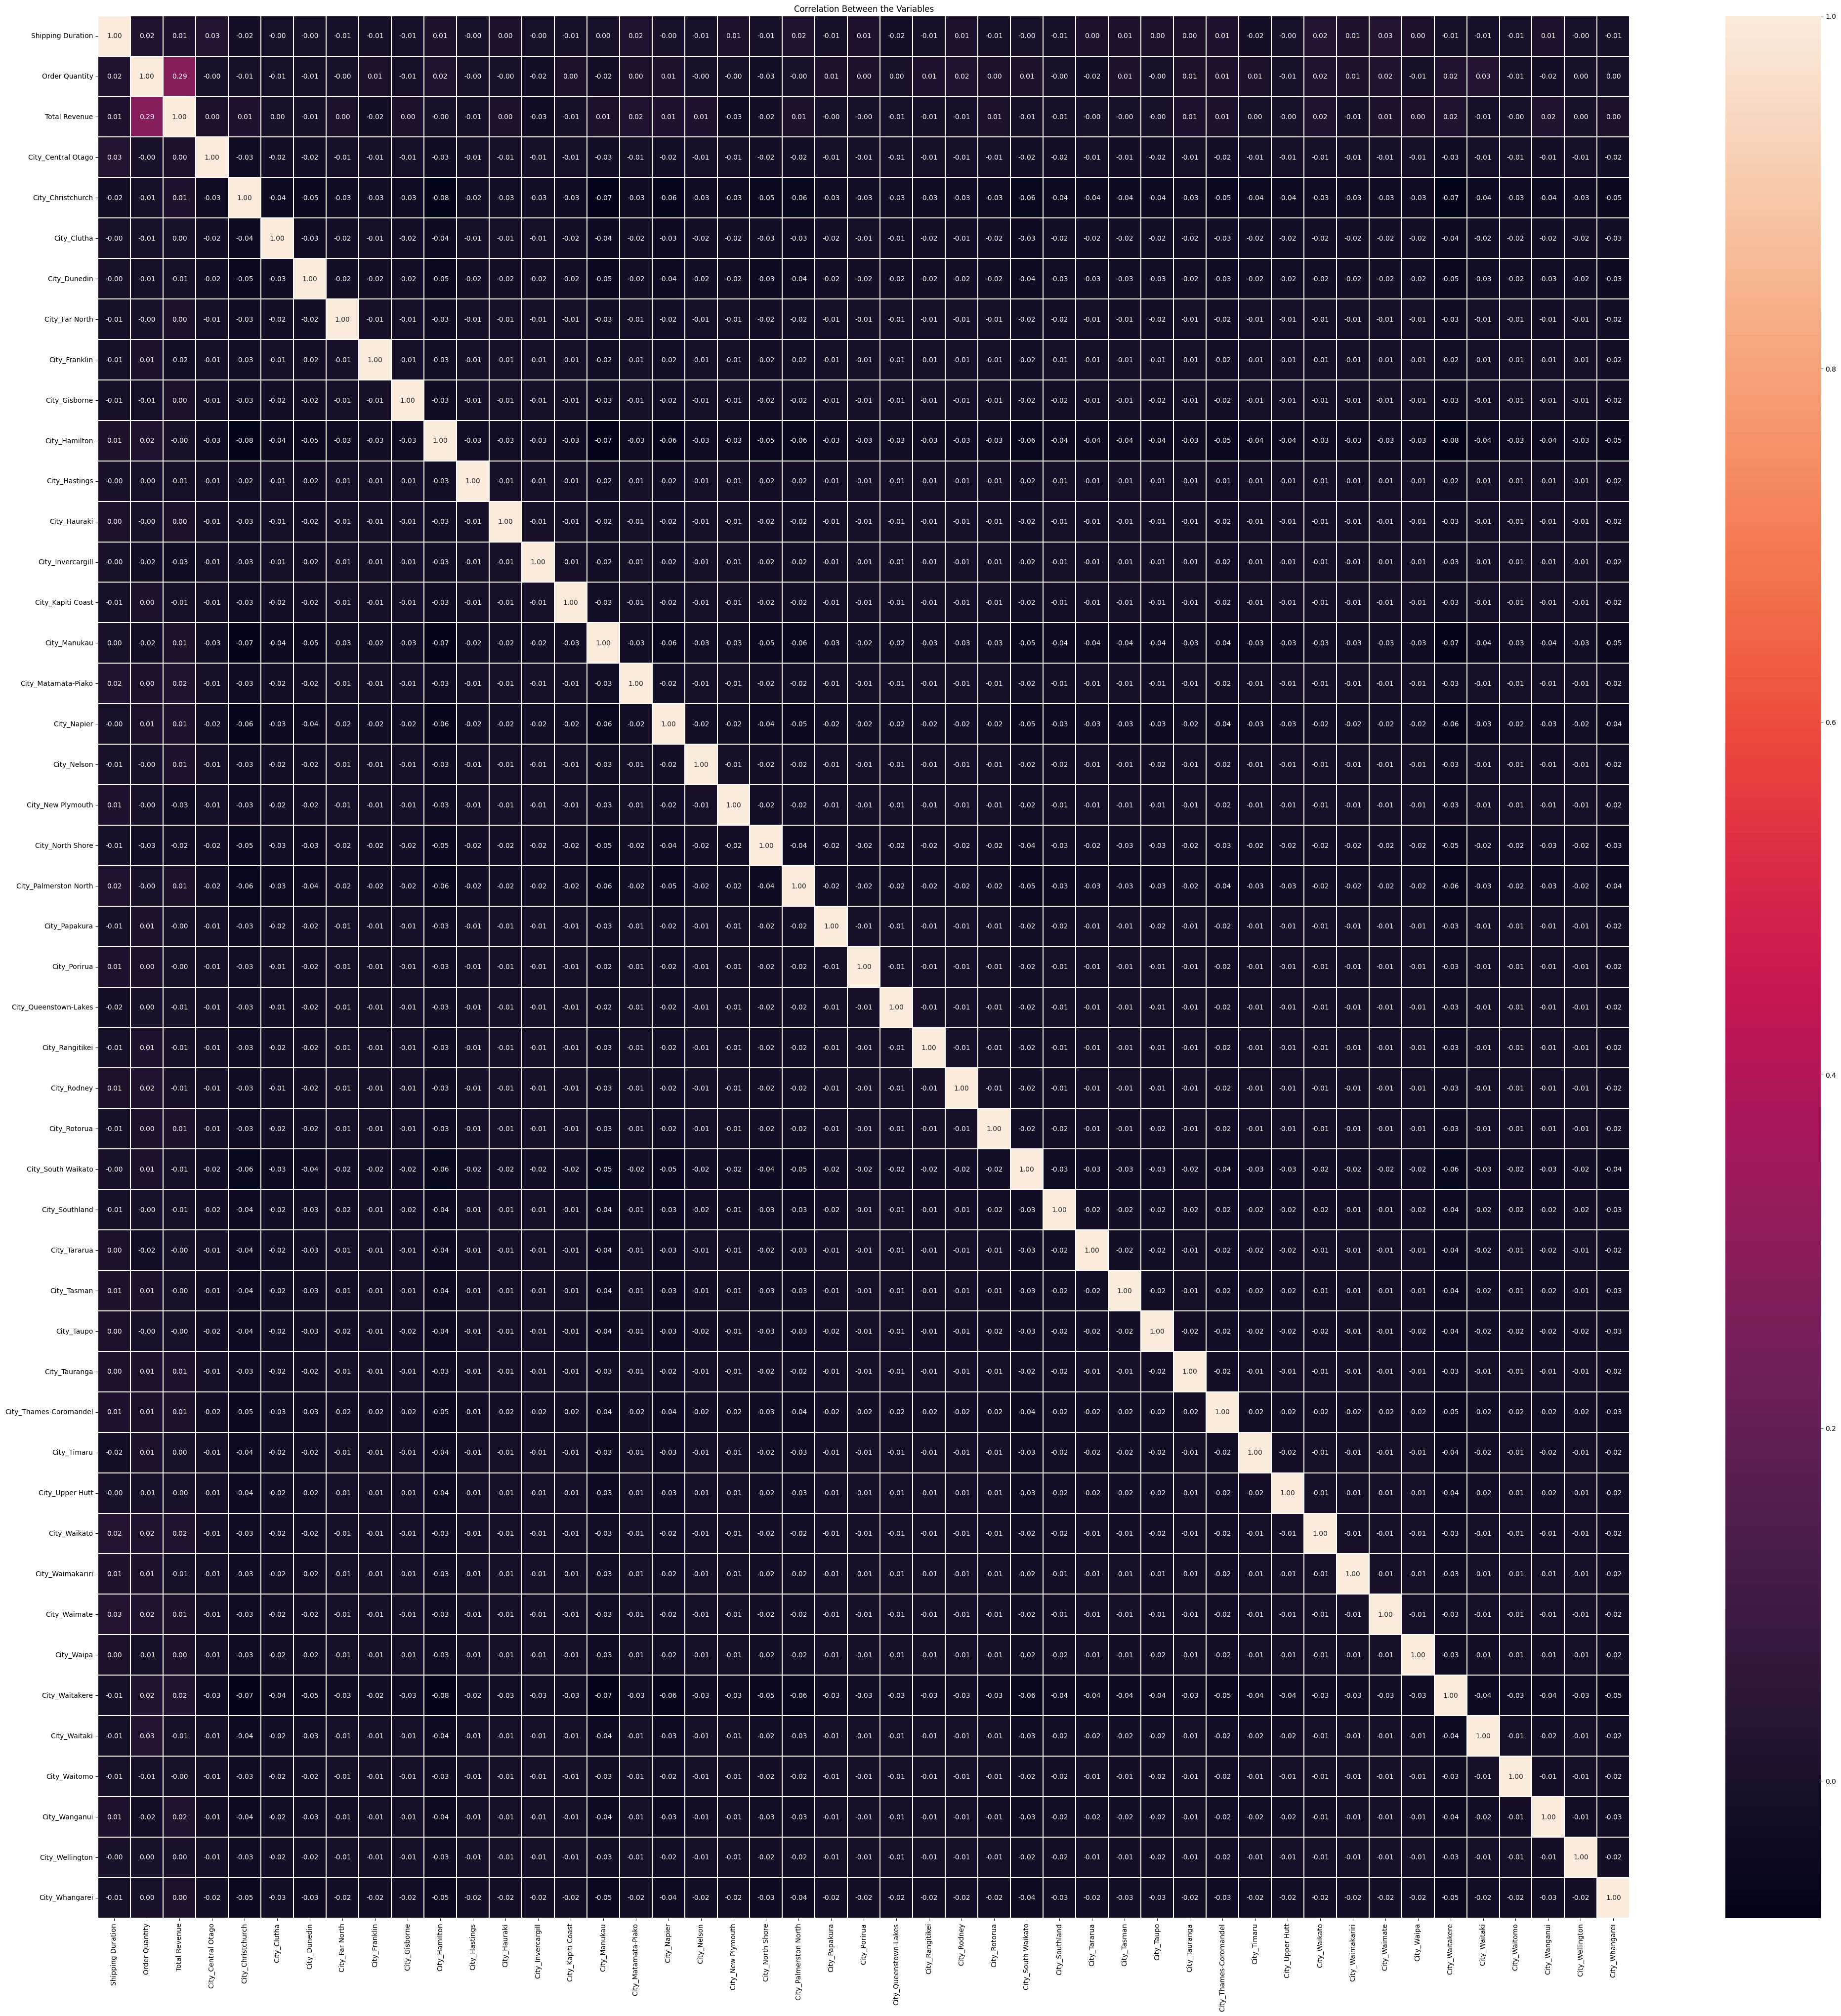

In [ ]:
# visualize the correlation between the features
plt.figure(figsize = (50, 50))
sns.heatmap(df.corr(), annot = True, linewidths=.2, fmt='.2f')
plt.title('Correlation Between the Variables')
plt.show()

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

df_scaled = pd.DataFrame(scaler.transform(df), columns = df.columns)
df_scaled.head()

,Shipping Duration,Order Quantity,Total Revenue,City_Central Otago,City_Christchurch,City_Clutha,City_Dunedin,City_Far North,City_Franklin,City_Gisborne,City_Hamilton,City_Hastings,City_Hauraki,City_Invercargill,City_Kapiti Coast,City_Manukau,City_Matamata-Piako,City_Napier,City_Nelson,City_New Plymouth,City_North Shore,City_Palmerston North,City_Papakura,City_Porirua,City_Queenstown-Lakes,City_Rangitikei,City_Rodney,City_Rotorua,City_South Waikato,City_Southland,City_Tararua,City_Tasman,City_Taupo,City_Tauranga,City_Thames-Coromandel,City_Timaru,City_Upper Hutt,City_Waikato,City_Waimakariri,City_Waimate,City_Waipa,City_Waitakere,City_Waitaki,City_Waitomo,City_Wanganui,City_Wellington,City_Whangarei
0,-0.315081,-0.637970,-0.083449,-0.104915,-0.276883,-0.150505,-0.183387,-0.104303,-0.090559,-0.101823,-0.280533,-0.089143,-0.095352,-0.094682,-0.099924,-0.257802,-0.099924,-0.228341,-0.104303,-0.101194,-0.17822,-0.213382,-0.101823,-0.095352,-0.09668,-0.100561,-0.098639,-0.102449,-0.211774,-0.147433,-0.136896,-0.142025,-0.147433,-0.101823,-0.167863,-0.134505,-0.132073,-0.10307,-0.101194,-0.099924,-0.105523,-0.270277,-0.137841,-0.10307,-0.142025,-0.102449,-0.18045
1,-0.973389,0.237828,-0.162780,-0.104915,-0.276883,-0.150505,-0.183387,-0.104303,-0.090559,-0.101823,-0.280533,-0.089143,-0.095352,-0.094682,-0.099924,-0.257802,-0.099924,-0.228341,-0.104303,-0.101194,-0.17822,-0.213382,-0.101823,-0.095352,-0.09668,-0.100561,-0.098639,-0.102449,-0.211774,-0.147433,-0.136896,-0.142025,-0.147433,-0.101823,-0.167863,-0.134505,-0.132073,-0.10307,-0.101194,-0.099924,-0.105523,-0.270277,-0.137841,-0.10307,-0.142025,-0.102449,-0.18045
2,-0.753953,-0.200071,0.575484,-0.104915,-0.276883,-0.150505,-0.183387,-0.104303,-0.090559,-0.101823,-0.280533,-0.089143,-0.095352,-0.094682,-0.099924,-0.257802,-0.099924,-0.228341,-0.104303,-0.101194,-0.17822,-0.213382,-0.101823,-0.095352,-0.09668,-0.100561,-0.098639,-0.102449,-0.211774,-0.147433,-0.136896,-0.142025,-0.147433,-0.101823,-0.167863,-0.134505,-0.132073,-0.10307,-0.101194,-0.099924,-0.105523,-0.270277,-0.137841,-0.10307,-0.142025,-0.102449,-0.18045
3,-0.973389,0.237828,-0.033826,-0.104915,-0.276883,-0.150505,-0.183387,-0.104303,-0.090559,-0.101823,-0.280533,-0.089143,-0.095352,-0.094682,-0.099924,-0.257802,-0.099924,-0.228341,-0.104303,-0.101194,-0.17822,-0.213382,-0.101823,-0.095352,-0.09668,-0.100561,-0.098639,-0.102449,-0.211774,-0.147433,-0.136896,-0.142025,-0.147433,-0.101823,-0.167863,-0.134505,-0.132073,-0.10307,-0.101194,-0.099924,-0.105523,-0.270277,-0.137841,-0.10307,-0.142025,-0.102449,-0.18045
4,-0.973389,-0.637970,1.459439,-0.104915,-0.276883,-0.150505,-0.183387,-0.104303,-0.090559,-0.101823,-0.280533,-0.089143,-0.095352,-0.094682,-0.099924,-0.257802,-0.099924,-0.228341,-0.104303,-0.101194,-0.17822,-0.213382,-0.101823,-0.095352,-0.09668,-0.100561,-0.098639,-0.102449,-0.211774,-0.147433,-0.136896,-0.142025,-0.147433,-0.101823,-0.167863,-0.134505,-0.132073,-0.10307,-0.101194,-0.099924,-0.105523,-0.270277,-0.137841,-0.10307,-0.142025,-0.102449,-0.18045


### **Principle Component Analysis (PCA):**

Now, that we have so many features, we cannot visualize those together after clustering as we can only show at most 3 variables together in a plot (3D) plot.

In these cases, Dimensionality Reduction techniques like **PCA (Principle Component Analysis)** are applied. Apply PCA we will reduce dimensions to 3.

Principle Components are build in an combination of the original variables. Principal Components represent the directions of the data that explain a maximal amount of variance, that is to say, capture most information of the data.

After reduction we will plot it.

First transform to 2 variables and then 3 variables.

In [ ]:
from sklearn.decomposition import PCA

# transform into 2 components
pca_2 = PCA(n_components = 2)
pca_2.fit(df_scaled)

df_pca_2 = pd.DataFrame(pca_2.transform(df_scaled), columns = (['PC1', 'PC2']))
df_pca_2.head()

,PC1,PC2
0,-0.518850,-0.138969
1,-0.032565,-0.507889
2,0.188224,-0.419601
3,0.054671,-0.514946
4,0.472908,-0.571045


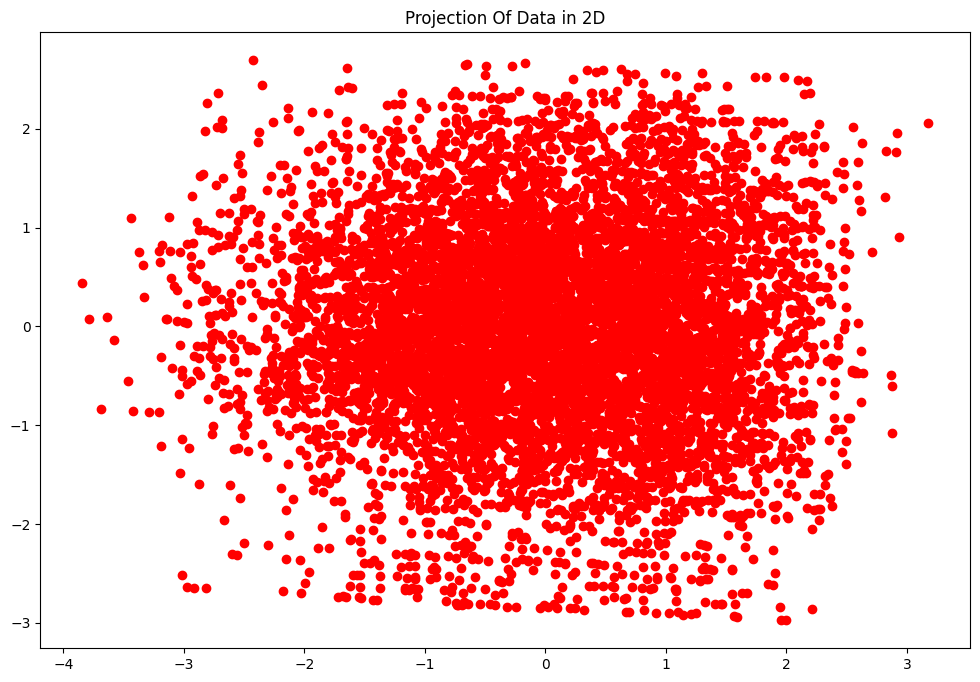

In [ ]:
#Let's plot this together in a 2d plot to better undertstand the relationship among those

plt.figure(figsize=(12,8))
plt.scatter(df_pca_2["PC1"], df_pca_2["PC2"], c="red", marker="o")
plt.title("Projection Of Data in 2D")
plt.show()

In [ ]:
# transform into 3 components
pca_3 = PCA(n_components = 3)
pca_3.fit(df_scaled)

df_pca_3 = pd.DataFrame(pca_3.transform(df_scaled), columns = (['PC1', 'PC2', 'PC3']))
df_pca_3.head()

,PC1,PC2,PC3
0,-0.518850,-0.138969,0.009334
1,-0.032565,-0.507889,0.121058
2,0.188224,-0.419601,0.067462
3,0.054671,-0.514946,0.119021
4,0.472908,-0.571045,0.064775


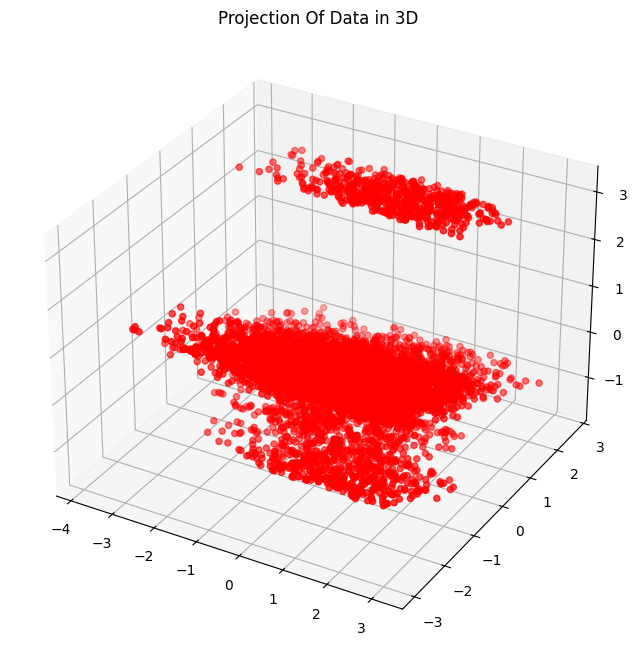

In [ ]:
#Let's plot this together in a 3D plot to better undertstand the relationship among those

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df_pca_3["PC1"], df_pca_3["PC2"], df_pca_3["PC3"], c="red", marker="o")
ax.set_title("Projection Of Data in 3D")
plt.show()

In [ ]:
# # Apply PCA
# pca = PCA()
# pca.fit(df_scaled)

# # Explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_variance = np.cumsum(explained_variance_ratio)

# # Print explained variance ratios and cumulative variance
# print("Explained Variance Ratio:", explained_variance_ratio)
# print("Cumulative Variance:", cumulative_variance)

# # Find the number of components that retain ~95% of variance
# n_components = np.argmax(cumulative_variance >= 0.95) + 1
# print("Optimal n_components:", n_components)

In [ ]:
# pca_85 = PCA(n_components = 85)
# pca_85.fit(df_scaled)

# # Dynamically generate column names
# n_components = pca_85.n_components_  # Get the number of components
# column_names = [f"PC{i+1}" for i in range(n_components)]

# # Apply PCA and create a DataFrame with dynamic column names
# df_pca_85 = pd.DataFrame(pca_85.transform(df_scaled), columns=column_names)

# # Display the first few rows
# df_pca_85.head()

In [ ]:
# #Let's plot this together in a 3D plot to better undertstand the relationship among those

# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(df_scaled["Shipping Duration"], df_scaled["Order Quantity"], df_scaled["Total Revenue"], c="red", marker="o")
# ax.set_title("Projection Of Data in 3D")
# plt.show()

# **Clustering**

I applied clustering techniques to three datasets: the first with only scaled data, the second with PCA-transformed data (3 components), and the third with PCA-transformed data (2 components).

In [ ]:
# Import the KElbowVisualizer from yellowbrick for finding the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Import clustering algorithms from sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering

### **On Scaled Data**

/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


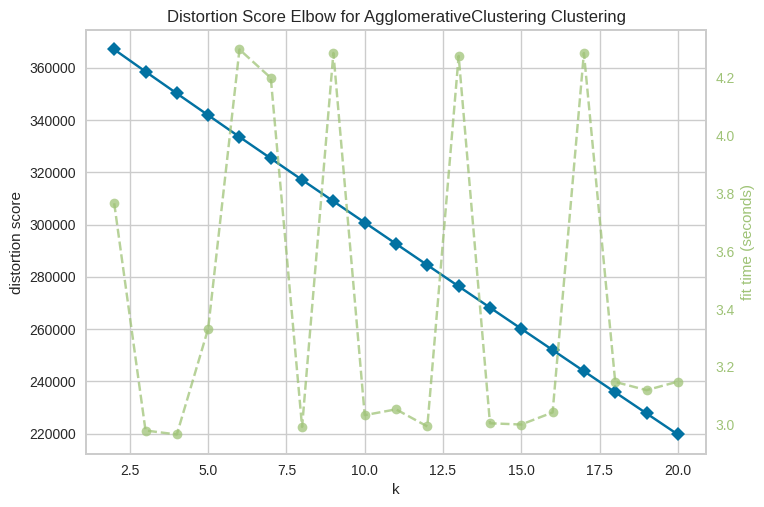

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to find the Optimum Number of Clusters (Agglomorative)

elbow_ac = KElbowVisualizer(AgglomerativeClustering(), k=20)
elbow_ac.fit(df_scaled)
elbow_ac.show()

The graph shows the best number of clusters (k) for Agglomerative Clustering by illustrating how the 'Distortion Score' (cluster tightness) and 'Fit Time' (calculation time) change as k increases. Ideally, we aim for the lowest distortion while keeping computation time reasonable. The 'elbow' in the distortion score suggests a good k value, likely around 5 or 7, balancing cluster quality and computation. However, the chart does not clearly indicate an optimal number of clusters.

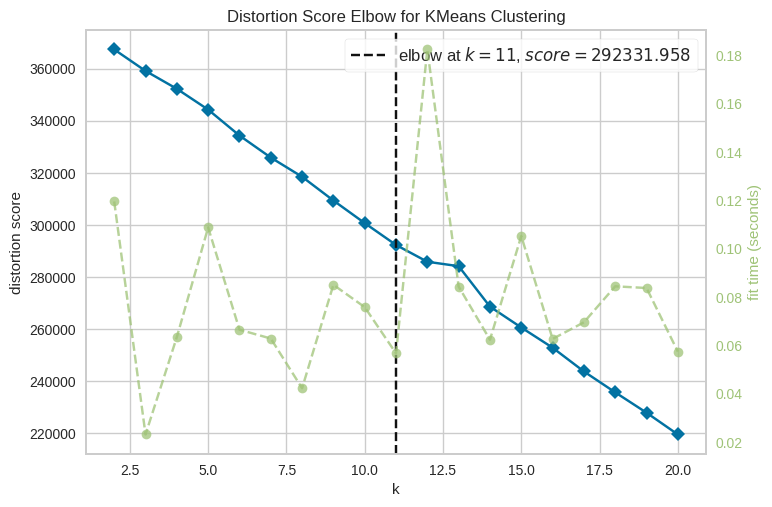

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to find the Optimum Number of Clusters (KMeans)

elbow_kc = KElbowVisualizer(KMeans(), k=20)
elbow_kc.fit(df_scaled)
elbow_kc.show()

This graph uses the elbow method to find the best number of clusters (k) for KMeans clustering.  It plots the "distortion score" (how spread out the clusters are) and "fit time" (calculation time) against different k values. The marked elbow point at k=11 suggests that 11 is the optimal number of clusters, balancing low distortion with a reasonable computation time, as further increasing k doesn't significantly reduce distortion while increasing the fit time.

In [ ]:
# fit and predict the Agglomerative Clustering technique with 3 clusters
AC = AgglomerativeClustering(n_clusters = 3)
yhat_ac = AC.fit_predict(df_scaled)
yhat_ac

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Let's check what are the cluster levels
np.unique(yhat_ac)

array([0, 1, 2])

In [ ]:
# silhouette score to evaluate the quality of clusters created by a clustering algorithm
from sklearn.metrics import silhouette_score

print(f"Silhouette Score is: {silhouette_score(df_scaled, yhat_ac)}")

Silhouette Score is: -0.06452556687232894


A **negative Silhouette Score** (-0.0645) suggests that some points may be assigned to the wrong clusters, meaning the clustering structure isn't well-defined.

In [ ]:
# fit and predict the KMeans Clustering technique with 3 clusters
kmeans = KMeans(n_clusters=11, random_state=42)
yhat_kc = kmeans.fit_predict(df_scaled)
print(f"Silhouette Score is: {silhouette_score(df_scaled, yhat_kc)}")

Silhouette Score is: 0.11904429913634253


A **low positive score** (0.1190) suggests that the clusters are weakly defined, meaning some overlap exists between them.

### **On PCA-transformed data (3 components)**

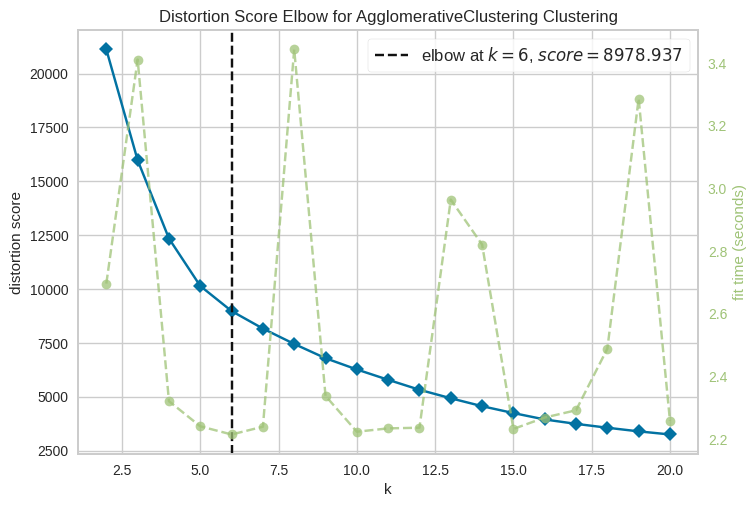

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to find the Optimum Number of Clusters (Agglomorative)

elbow_ac_2 = KElbowVisualizer(AgglomerativeClustering(), k=20)
elbow_ac_2.fit(df_pca_3)
elbow_ac_2.show()

This graph uses the elbow method to determine the optimal number of clusters (k) for Agglomerative Clustering. It plots the "distortion score" (measuring cluster tightness) and "fit time" (calculation time) against different k values. The elbow point marked at k=6 suggests that 6 is the best choice for the number of clusters, as it offers a good balance between minimizing distortion and keeping the computation time reasonable, because increasing k beyond 6 doesn't significantly reduce distortion.

In [ ]:
# fit and predict the Agglomerative Clustering technique with 3 clusters
AC_2 = AgglomerativeClustering(n_clusters = 6)
yhat_ac_2 = AC_2.fit_predict(df_pca_3)
print(f"Silhouette Score is: {silhouette_score(df_pca_3, yhat_ac_2)}")

Silhouette Score is: 0.22456661352972077


A **moderate Silhouette Score** (0.2246) indicates that the clustering is improving, but there is still room for refinement.

In [ ]:
# loop through different number of clusters to see how the silhouette score changing
for i in range(2, 15):  # Start from 2 clusters
  AC_n = AgglomerativeClustering(n_clusters=i)
  yhat_ac_n = AC_n.fit_predict(df_pca_3)
  score = silhouette_score(df_pca_3, yhat_ac_n)  # Compute Silhouette Score
  print(f"Silhouette Score for {i} clusters: {score:.4f}")  # Format output

Silhouette Score for 2 clusters: 0.4901
Silhouette Score for 3 clusters: 0.2731
Silhouette Score for 4 clusters: 0.2545
Silhouette Score for 5 clusters: 0.2729
Silhouette Score for 6 clusters: 0.2246
Silhouette Score for 7 clusters: 0.2240
Silhouette Score for 8 clusters: 0.2212
Silhouette Score for 9 clusters: 0.2419
Silhouette Score for 10 clusters: 0.2478
Silhouette Score for 11 clusters: 0.2557
Silhouette Score for 12 clusters: 0.2464
Silhouette Score for 13 clusters: 0.2471
Silhouette Score for 14 clusters: 0.2473


The silhouette score is highest for **2 clusters (0.4901)**, indicating the best-defined separation. As the number of clusters increases, the score drops significantly, reaching its lowest around **6-8 clusters**, suggesting weak separation. Beyond this, the scores fluctuate slightly but remain relatively low, implying that adding more clusters does not improve the quality. **Choosing 2 clusters seems optimal**, as higher cluster numbers reduce cohesion and separation quality.

In [ ]:
# fit and predict the Agglomerative Clustering technique with 2 clusters
AC_3 = AgglomerativeClustering(n_clusters = 2)
yhat_ac_3 = AC_3.fit_predict(df_pca_3)
print(f"Silhouette Score is: {silhouette_score(df_pca_3, yhat_ac_3)}")

Silhouette Score is: 0.49005940215367455


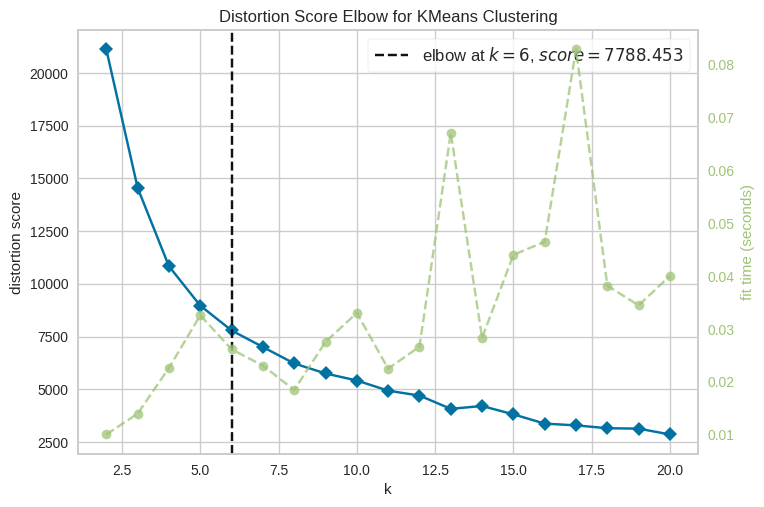

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to find the Optimum Number of Clusters (KMeans)

elbow_kc_2 = KElbowVisualizer(KMeans(), k=20)
elbow_kc_2.fit(df_pca_3)
elbow_kc_2.show()

The graph uses the elbow method to find the best number of clusters (k) for KMeans. It plots "distortion score" (cluster spread) and "fit time" (calculation time) against different k values.  The elbow at k=6 indicates 6 clusters offer a good balance, minimizing distortion without a large increase in computation time, as beyond k=6 the distortion doesn't decrease much.

In [ ]:
# fit and predict the KMeans Clustering technique with 6 clusters
kmeans_2 = KMeans(n_clusters=6, random_state=42)
yhat_kc_2 = kmeans_2.fit_predict(df_pca_3)
print(f"Silhouette Score is: {silhouette_score(df_pca_3, yhat_kc_2)}")

Silhouette Score is: 0.3046788674897927


In [ ]:
# loop through different number of clusters to see how the silhouette score changing
for i in range(2, 15): # Start from 2 clusters
  kmeans_n = KMeans(n_clusters=i, random_state=42)
  yhat_kc_n = kmeans_n.fit_predict(df_pca_3)
  score = silhouette_score(df_pca_3, yhat_kc_n)  # Compute Silhouette Score
  print(f"Silhouette Score for {i} clusters: {score:.4f}")  # Format output

Silhouette Score for 2 clusters: 0.2688
Silhouette Score for 3 clusters: 0.3295
Silhouette Score for 4 clusters: 0.3342
Silhouette Score for 5 clusters: 0.3277
Silhouette Score for 6 clusters: 0.3047
Silhouette Score for 7 clusters: 0.3042
Silhouette Score for 8 clusters: 0.3171
Silhouette Score for 9 clusters: 0.3027
Silhouette Score for 10 clusters: 0.3072
Silhouette Score for 11 clusters: 0.3235
Silhouette Score for 12 clusters: 0.3307
Silhouette Score for 13 clusters: 0.3259
Silhouette Score for 14 clusters: 0.3239


The silhouette scores indicate that clustering quality varies with the number of clusters. The highest score (0.3342) occurs at **4 clusters**, suggesting it provides the best separation among data points. Scores slightly decrease or fluctuate beyond this, meaning adding more clusters does not significantly improve clustering quality. Thus, **4 clusters appear to be the optimal choice** based on the silhouette score.

In [ ]:
# fit and predict the KMeans Clustering technique with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
yhat_kc_3 = kmeans_3.fit_predict(df_pca_3)
print(f"Unique Clusters: {np.unique(yhat_kc_3)}")
print(f"Silhouette Score is: {silhouette_score(df_pca_3, yhat_kc_3)}")

Unique Clusters: [0 1 2]
Silhouette Score is: 0.32951871651768017


In [ ]:
# got that Agglomerative Clustering technique with 2 clusters got the best result for PCA-transformed data (3 components)
# so add it to PCA transformed dataframe
df_pca_3['Clusters'] = yhat_ac_3
df_pca_3.head()

,PC1,PC2,PC3,Clusters
0,-0.518850,-0.138969,0.009334,0
1,-0.032565,-0.507889,0.121058,0
2,0.188224,-0.419601,0.067462,0
3,0.054671,-0.514946,0.119021,0
4,0.472908,-0.571045,0.064775,0


In [ ]:
df_pca_3.Clusters.value_counts() # check the clusters frequency

,count
Clusters,
0,7408
1,583


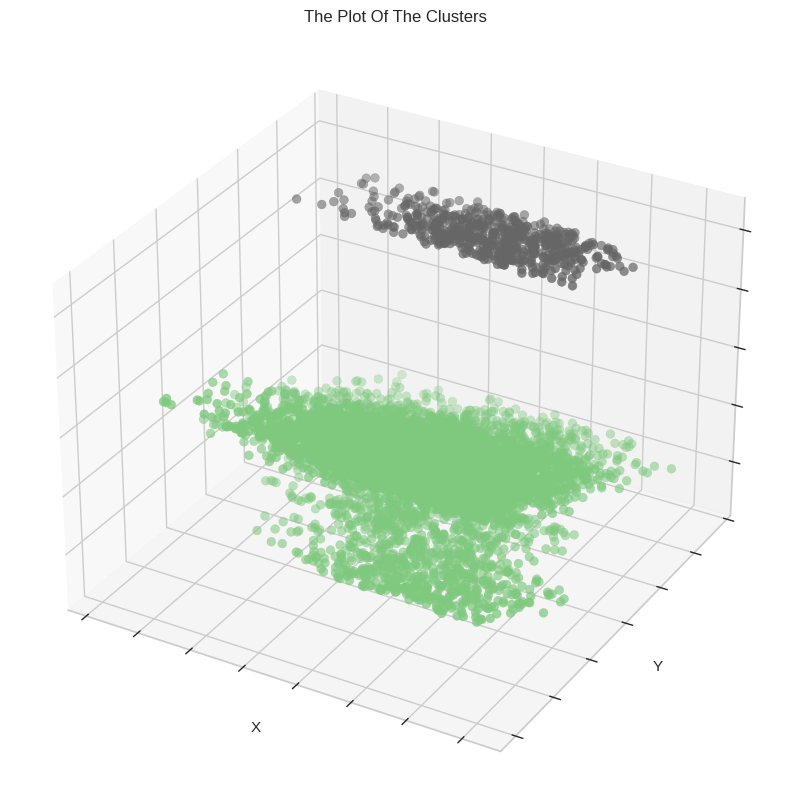

In [ ]:
#Let's plot the Principle Components on a 3D plot with cluster levels

fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df_pca_3["PC1"], df_pca_3["PC2"], df_pca_3["PC3"], s=40, c=df_pca_3["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_zticklabels('')
plt.show()

This 3D plot visualizes two distinct clusters. One cluster is located higher on the Y-axis and is more densely packed, while the other is spread lower and wider along the X and Z axes.  This suggests the clustering algorithm effectively separated the data into two groups based on their feature relationships in this three-dimensional space.

### **On PCA-transformed data (2 components)**

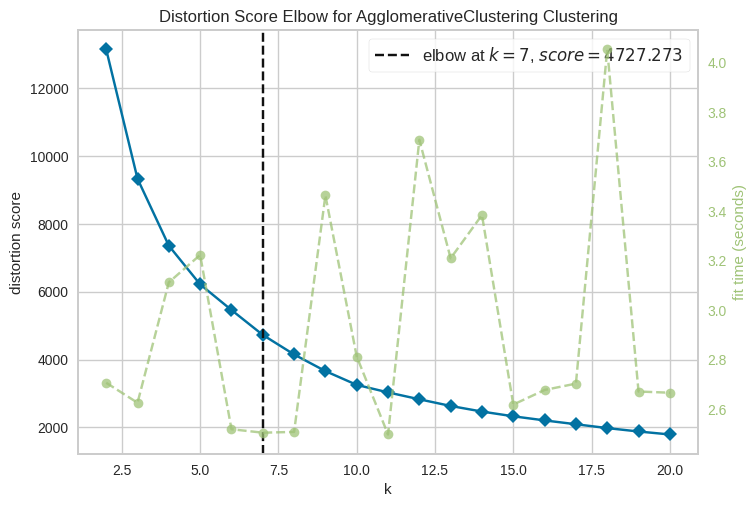

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to find the Optimum Number of Clusters (Agglomorative)

elbow_ac_3 = KElbowVisualizer(AgglomerativeClustering(), k=20)
elbow_ac_3.fit(df_pca_2)
elbow_ac_3.show()

The graph helps find the best number of clusters (k) for Agglomerative Clustering using the elbow method. It shows how the "distortion score" (cluster tightness) and "fit time" (calculation time) change with different k values. The elbow at k=7 suggests 7 clusters is a good choice, balancing low distortion and reasonable computation time, as increasing k beyond 7 doesn't significantly reduce distortion.

In [ ]:
# fit and predict the Agglomerative Clustering technique with 7 clusters
AC_4 = AgglomerativeClustering(n_clusters = 7)
yhat_ac_4 = AC_4.fit_predict(df_pca_2)
print(f"Silhouette Score is: {silhouette_score(df_pca_2, yhat_ac_4)}")

Silhouette Score is: 0.26072759031740317


The silhouette score of **0.2607** suggests that the clustering structure is **moderate but not very strong**. While some clusters may be well-defined, there is likely some overlap or misclassification among clusters.

In [ ]:
# loop through different number of clusters to see how the silhouette score changing
for i in range(2, 15):  # Start from 2 clusters
  AC_n = AgglomerativeClustering(n_clusters=i)
  yhat_ac_n = AC_n.fit_predict(df_pca_2)
  score = silhouette_score(df_pca_2, yhat_ac_n)  # Compute Silhouette Score
  print(f"Silhouette Score for {i} clusters: {score:.4f}")  # Format output

Silhouette Score for 2 clusters: 0.3081
Silhouette Score for 3 clusters: 0.2933
Silhouette Score for 4 clusters: 0.2715
Silhouette Score for 5 clusters: 0.2573
Silhouette Score for 6 clusters: 0.2532
Silhouette Score for 7 clusters: 0.2607
Silhouette Score for 8 clusters: 0.2630
Silhouette Score for 9 clusters: 0.2684
Silhouette Score for 10 clusters: 0.2843
Silhouette Score for 11 clusters: 0.2815
Silhouette Score for 12 clusters: 0.2761
Silhouette Score for 13 clusters: 0.2635
Silhouette Score for 14 clusters: 0.2615


The silhouette scores show that **2 clusters (0.3081) provide the highest score**, suggesting the best separation. As the number of clusters increases, the scores generally decrease, indicating weaker clustering quality. However, there is a slight improvement around **10 clusters (0.2843)**. Overall, **2 clusters seem to be the optimal choice**, but if more granularity is needed, **10 clusters** could also be considered.

In [ ]:
# fit and predict the Agglomerative Clustering technique with 2 clusters
AC_5 = AgglomerativeClustering(n_clusters = 2)
yhat_ac_5 = AC_5.fit_predict(df_pca_2)
print(f"Unique Clusters: {np.unique(yhat_ac_5)}")
print(f"Silhouette Score is: {silhouette_score(df_pca_2, yhat_ac_5)}")

Unique Clusters: [0 1]
Silhouette Score is: 0.3081408135854664


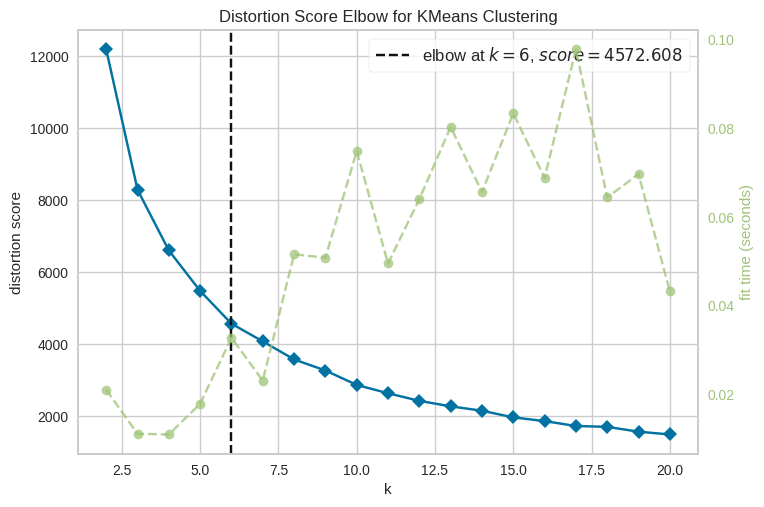

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to find the Optimum Number of Clusters (KMeans)

elbow_kc_3 = KElbowVisualizer(KMeans(), k=20)
elbow_kc_3.fit(df_pca_2)
elbow_kc_3.show()

This elbow method graph for KMeans clustering helps determine the best number of clusters (k).  The plot shows "distortion score" (cluster spread) decreasing as k increases, and "fit time" (calculation time) fluctuating. The elbow point marked at k=6 suggests 6 clusters is optimal, balancing low distortion with reasonable computation, as increasing k further offers diminishing returns in reducing distortion.

In [ ]:
# fit and predict the KMeans Clustering technique with 6 clusters
kmeans_4 = KMeans(n_clusters=6, random_state=42)
yhat_kc_4 = kmeans_4.fit_predict(df_pca_2)
print(f"Silhouette Score is: {silhouette_score(df_pca_2, yhat_kc_4)}")

Silhouette Score is: 0.3307312185957893


A silhouette score of **0.3307** suggests a **moderate clustering structure**, where clusters are somewhat well-separated but may have some overlap.

In [ ]:
# loop through different number of clusters to see how the silhouette score changing
for i in range(2, 15): # Start from 2 clusters
  kmeans_n = KMeans(n_clusters=i, random_state=42)
  yhat_kc_n = kmeans_n.fit_predict(df_pca_2)
  score = silhouette_score(df_pca_2, yhat_kc_n)  # Compute Silhouette Score
  print(f"Silhouette Score for {i} clusters: {score:.4f}")  # Format output

Silhouette Score for 2 clusters: 0.3406
Silhouette Score for 3 clusters: 0.3466
Silhouette Score for 4 clusters: 0.3203
Silhouette Score for 5 clusters: 0.3078
Silhouette Score for 6 clusters: 0.3307
Silhouette Score for 7 clusters: 0.3177
Silhouette Score for 8 clusters: 0.3124
Silhouette Score for 9 clusters: 0.3198
Silhouette Score for 10 clusters: 0.3245
Silhouette Score for 11 clusters: 0.3235
Silhouette Score for 12 clusters: 0.3199
Silhouette Score for 13 clusters: 0.3247
Silhouette Score for 14 clusters: 0.3211


The highest silhouette score is **0.3466 for 3 clusters**, indicating the best-defined clustering structure. Scores drop after 3 clusters, with some fluctuations, suggesting that adding more clusters does not significantly improve separation. **3 clusters appear to be the optimal choice** for this dataset.

In [ ]:
# fit and predict the KMeans Clustering technique with 3 clusters
kmeans_5 = KMeans(n_clusters=3, random_state=42)
yhat_kc_5 = kmeans_5.fit_predict(df_pca_2)
print(f"Unique Clusters: {np.unique(yhat_kc_5)}")
print(f"Silhouette Score is: {silhouette_score(df_pca_2, yhat_kc_5)}")

Unique Clusters: [0 1 2]
Silhouette Score is: 0.34662743158960063


In [ ]:
# got that KMeans Clustering technique with 3 clusters got the best result for PCA-transformed data (2 components)
# so add it to PCA transformed dataframe
df_pca_2['Clusters'] = yhat_kc_5
df_pca_2.head()

,PC1,PC2,Clusters
0,-0.518850,-0.138969,1
1,-0.032565,-0.507889,2
2,0.188224,-0.419601,2
3,0.054671,-0.514946,2
4,0.472908,-0.571045,2


In [ ]:
df_pca_2.Clusters.value_counts() # check the clusters frequency

,count
Clusters,
1,2818
0,2667
2,2506


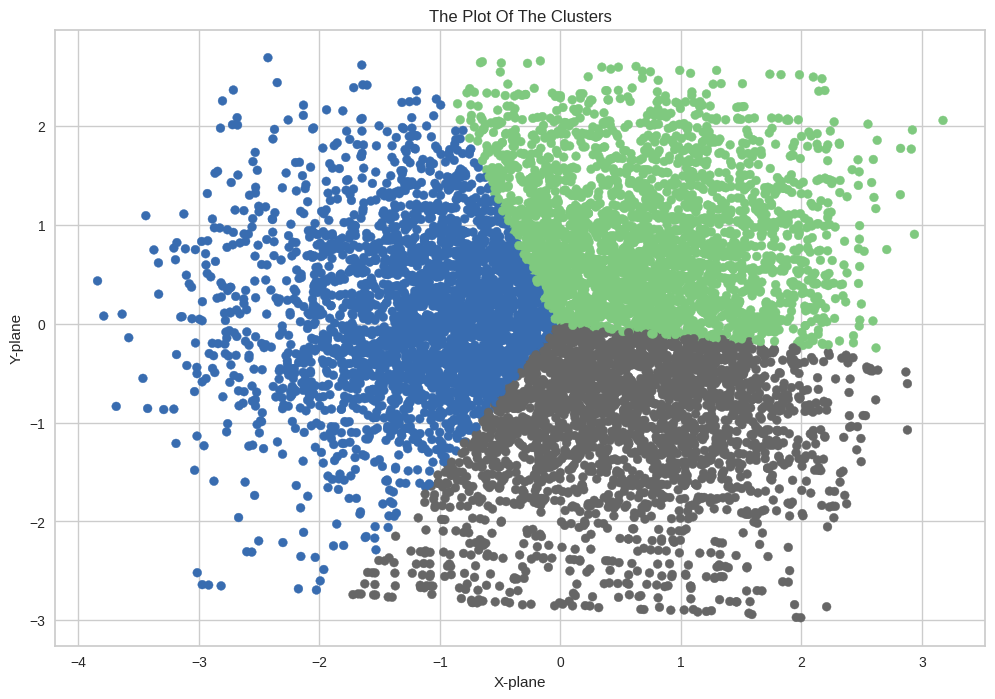

In [ ]:
#Let's plot this together in a 2d plot to better undertstand the relationship among those

plt.figure(figsize=(12,8))
plt.scatter(df_pca_2["PC1"], df_pca_2["PC2"], s=40, c=df_pca_2["Clusters"], marker='o', cmap = "Accent")
plt.title("The Plot Of The Clusters")
plt.xlabel('X-plane')
plt.ylabel('Y-plane')
plt.show()

The scatter plot shows **three well-separated clusters**, each containing a similar number of data points (ranging from **2506 to 2818**). The clustering appears to follow a **normal distribution**, suggesting that the algorithm has grouped the data based on natural variations. The **balanced cluster sizes** indicate a well-formed segmentation, with clear decision boundaries between groups. The highest silhouette score is **0.3466 for 3 clusters**, indicating the best-defined clustering structure. Scores drop after 3 clusters, with some fluctuations, suggesting that adding more clusters does not significantly improve separation. **3 clusters appear to be the optimal choice** for this dataset.

### **Selection**
For the strongest separation, 2 clusters provide the highest silhouette score, indicating well-defined groupings. If more granularity is needed without significantly compromising clustering quality, 3 or 4 clusters can be considered. Adding more clusters beyond this does not substantially improve separation and may lead to weaker clustering quality.

So take the 2 clusters that generated from Agglomerative Clustering on PCA(3 components)

# **Cluster Profiling**

In [ ]:
yhat_ac_3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(yhat_ac_3) # check the unique clusters

array([0, 1])

In [ ]:
sales_data.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Names,Product Name,Suburb,City,postcode,Longitude,Latitude,Full Address,Total Cost,Profit,Shipping Duration
0,SO - 0003309,2017-04-11,2017-04-20,37,Export,NZD,AXW291,1,1,7,2351.700,1622.67300,16461.900,AuroMedics Corp,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",11358.71,5103.19,9
1,SO - 0004862,2017-05-01,2017-05-07,34,Distributor,NZD,AXW291,1,1,9,1688.400,1063.69200,15195.600,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",9573.23,5622.37,6
2,SO - 0006968,2017-07-30,2017-08-06,29,Distributor,NZD,AXW291,1,1,8,3999.900,3319.91700,31999.200,"Apotheca, Ltd",Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",26559.34,5439.86,7
3,SO - 0001688,2017-12-30,2018-01-05,49,Wholesale,NZD,AXW291,1,1,9,1922.900,1480.63300,17306.100,Bare,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",13325.70,3980.40,6
4,SO - 0002460,2018-01-14,2018-01-20,34,Wholesale,NZD,AXW291,1,1,7,11150.475,9254.89425,78053.325,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",64784.26,13269.06,6


In [ ]:
# merge the clusters with the main data
sales_data_clustered = sales_data.merge(df_pca_3.Clusters, left_index=True, right_index=True)
sales_data_clustered.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Names,Product Name,Suburb,City,postcode,Longitude,Latitude,Full Address,Total Cost,Profit,Shipping Duration,Clusters
0,SO - 0003309,2017-04-11,2017-04-20,37,Export,NZD,AXW291,1,1,7,2351.700,1622.67300,16461.900,AuroMedics Corp,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",11358.71,5103.19,9,0
1,SO - 0004862,2017-05-01,2017-05-07,34,Distributor,NZD,AXW291,1,1,9,1688.400,1063.69200,15195.600,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",9573.23,5622.37,6,0
2,SO - 0006968,2017-07-30,2017-08-06,29,Distributor,NZD,AXW291,1,1,8,3999.900,3319.91700,31999.200,"Apotheca, Ltd",Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",26559.34,5439.86,7,0
3,SO - 0001688,2017-12-30,2018-01-05,49,Wholesale,NZD,AXW291,1,1,9,1922.900,1480.63300,17306.100,Bare,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",13325.70,3980.40,6,0
4,SO - 0002460,2018-01-14,2018-01-20,34,Wholesale,NZD,AXW291,1,1,7,11150.475,9254.89425,78053.325,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",64784.26,13269.06,6,0


In [ ]:
# replace the cluster names (Cluster-1 for 0 and Cluster-2 for 1) on the main data
sales_data_clustered['Clusters'] = sales_data_clustered['Clusters'].map({0: 'Cluster-1', 1: 'Cluster-2'})
sales_data_clustered.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Names,Product Name,Suburb,City,postcode,Longitude,Latitude,Full Address,Total Cost,Profit,Shipping Duration,Clusters
0,SO - 0003309,2017-04-11,2017-04-20,37,Export,NZD,AXW291,1,1,7,2351.700,1622.67300,16461.900,AuroMedics Corp,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",11358.71,5103.19,9,Cluster-1
1,SO - 0004862,2017-05-01,2017-05-07,34,Distributor,NZD,AXW291,1,1,9,1688.400,1063.69200,15195.600,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",9573.23,5622.37,6,Cluster-1
2,SO - 0006968,2017-07-30,2017-08-06,29,Distributor,NZD,AXW291,1,1,8,3999.900,3319.91700,31999.200,"Apotheca, Ltd",Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",26559.34,5439.86,7,Cluster-1
3,SO - 0001688,2017-12-30,2018-01-05,49,Wholesale,NZD,AXW291,1,1,9,1922.900,1480.63300,17306.100,Bare,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",13325.70,3980.40,6,Cluster-1
4,SO - 0002460,2018-01-14,2018-01-20,34,Wholesale,NZD,AXW291,1,1,7,11150.475,9254.89425,78053.325,OUR Ltd,Product 1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland",64784.26,13269.06,6,Cluster-1


In [ ]:
# check the cluster frequency
sales_data_clustered['Clusters'].value_counts()

,count
Clusters,
Cluster-1,7408
Cluster-2,583


In [ ]:
# replace the cluster names (Cluster-1 for 0 and Cluster-2 for 1) on the transformed data
df_pca_3['Clusters'] = df_pca_3['Clusters'].map({0: 'Cluster-1', 1: 'Cluster-2'})
df_pca_3.head()

,PC1,PC2,PC3,Clusters
0,-0.518850,-0.138969,0.009334,Cluster-1
1,-0.032565,-0.507889,0.121058,Cluster-1
2,0.188224,-0.419601,0.067462,Cluster-1
3,0.054671,-0.514946,0.119021,Cluster-1
4,0.472908,-0.571045,0.064775,Cluster-1


In [ ]:
df_pca_3['Clusters'].value_counts()

,count
Clusters,
Cluster-1,7408
Cluster-2,583


In [ ]:
print(f"Shapes of the main data and the PCA transformed data are: {sales_data_clustered.shape, df_pca_3.shape}")
print(f"Columns of the main data and the PCA transformed data are: \nFor main data->\n{sales_data_clustered.columns},\nFor PCA transformed data->\n{df_pca_3.columns}")

Shapes of the main data and the PCA transformed data are: ((7991, 25), (7991, 4))
Columns of the main data and the PCA transformed data are: 
For main data->
Index(['OrderNumber', 'OrderDate', 'Ship Date', 'Customer Name Index',
       'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Total Unit Cost', 'Total Revenue', 'Customer Names', 'Product Name',
       'Suburb', 'City', 'postcode', 'Longitude', 'Latitude', 'Full Address',
       'Total Cost', 'Profit', 'Shipping Duration', 'Clusters'],
      dtype='object'),
For PCA transformed data->
Index(['PC1', 'PC2', 'PC3', 'Clusters'], dtype='object')


In [ ]:
# write data on bigquery
from pandas_gbq import to_gbq

to_gbq(sales_data_clustered, 'transactional_data.clustered_table', project_id=project_id, chunksize=None, if_exists='replace')
to_gbq(df_pca_3, 'transactional_data.transformed_table', project_id=project_id, chunksize=None, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 1350.39it/s]
